many yt objects contain nested weak references to dataset objects. This makes them hard to return from a server and complicates json processing for multiple datasets... 

this notebook just shows a few simple cases to illustrate this. 

So let's load a dataset and get a slice:

In [1]:
import yt

yt : [INFO     ] 2022-07-12 12:04:54,269 Sample dataset found in '/home/chris/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2022-07-12 12:04:54,395 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2022-07-12 12:04:54,398 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-07-12 12:04:54,400 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-12 12:04:54,402 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-07-12 12:04:54,403 Parameters: cosmological_simulation   = 0
Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 7111.57it/s]
yt : [INFO     ] 2022-07-12 12:04:54,455 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2022-07-12 12:04:56,647 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-07-12 12:04:56,649 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-07-12 12:04:56,650 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-07-12 12:04


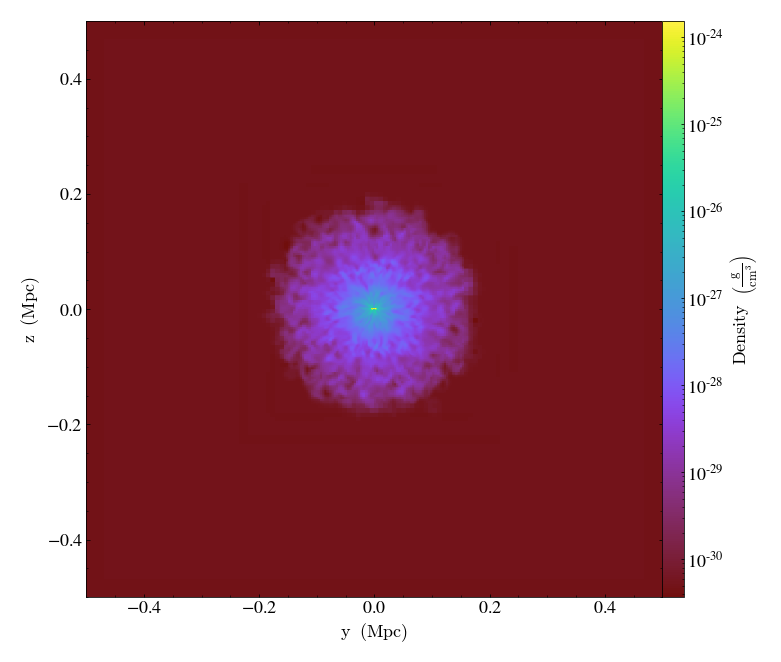

In [2]:
ds = yt.load_sample("IsolatedGalaxy")
slc = yt.SlicePlot(ds, "x", ("gas", "density"))
slc.show()

the slice object contains weak references to yt objects:

In [3]:
slc.ds

<weakproxy at 0x7f4355a00090 to EnzoDataset at 0x7f4355b4feb0>

In [4]:
slc.data_source.ds

<weakproxy at 0x7f4355a00090 to EnzoDataset at 0x7f4355b4feb0>

loading up another dataset and overwriting the `ds` variable will destroy those references:

yt : [INFO     ] 2022-07-12 12:04:58,172 Sample dataset found in '/home/chris/hdd/data/yt_data/yt_sample_sets/enzo_tiny_cosmology/DD0046/DD0046'
yt : [INFO     ] 2022-07-12 12:04:58,330 Parameters: current_time              = 230.66527489234
yt : [INFO     ] 2022-07-12 12:04:58,331 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-07-12 12:04:58,332 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-12 12:04:58,333 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-07-12 12:04:58,334 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-07-12 12:04:58,335 Parameters: current_redshift          = -2.7810863612032e-09
yt : [INFO     ] 2022-07-12 12:04:58,335 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2022-07-12 12:04:58,336 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2022-07-12 12:04:58,337 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2022-07-12 12:04:58,3


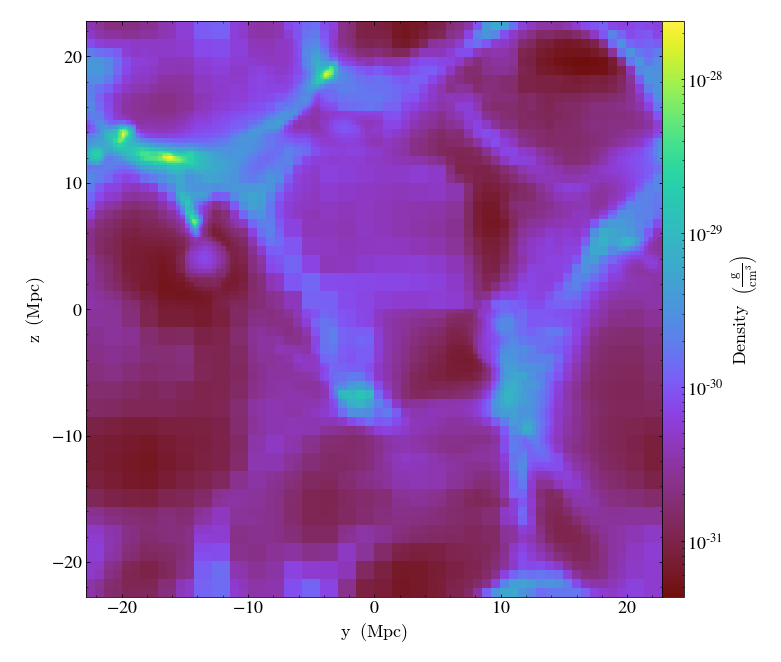

In [5]:
ds = yt.load_sample("enzo_tiny_cosmology")
slc2 = yt.SlicePlot(ds, "x", ("gas", "density"))
slc2.show()

so now we try to view our old slice:

In [6]:
slc.show()

ReferenceError: weakly-referenced object no longer exists

and we see the "weakly-referenced object no longer exists" message, which happens because the original dataset no longer exists. So if we are processing multiple datasets, we'll either need to do it in a way that keeps all dataset references alive:

In [7]:
ds = yt.load_sample("IsolatedGalaxy")
slc = yt.SlicePlot(ds, "x", ("gas", "density"))

ds2 = yt.load_sample("enzo_tiny_cosmology")
slc2 = yt.SlicePlot(ds2, "x", ("gas", "density"))

sliceoutputs = [slc, slc2]

yt : [INFO     ] 2022-07-12 12:07:20,165 Sample dataset found in '/home/chris/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2022-07-12 12:07:20,272 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2022-07-12 12:07:20,273 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-07-12 12:07:20,275 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-12 12:07:20,276 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-07-12 12:07:20,277 Parameters: cosmological_simulation   = 0
Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 8248.15it/s]
yt : [INFO     ] 2022-07-12 12:07:20,320 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2022-07-12 12:07:22,681 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-07-12 12:07:22,682 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-07-12 12:07:22,684 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-07-12 12:07


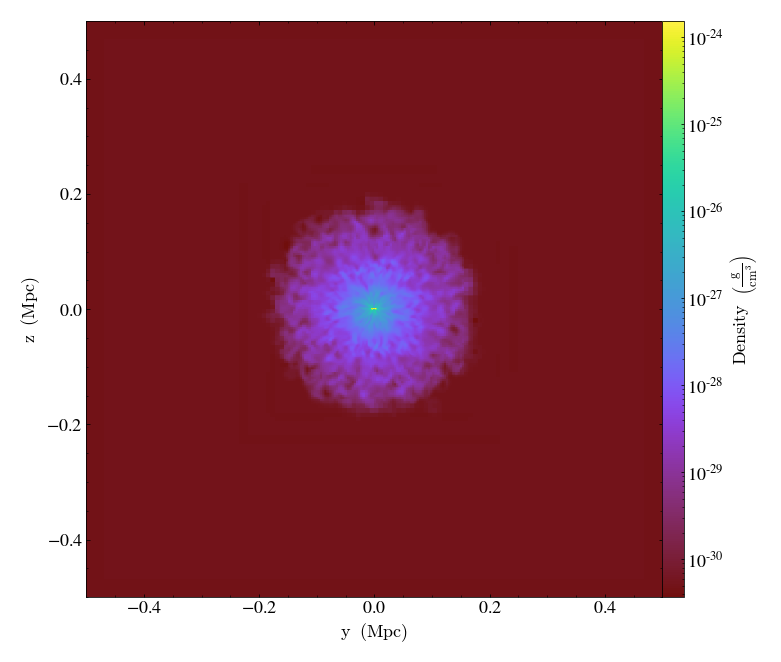

In [8]:
sliceoutputs[0].show()


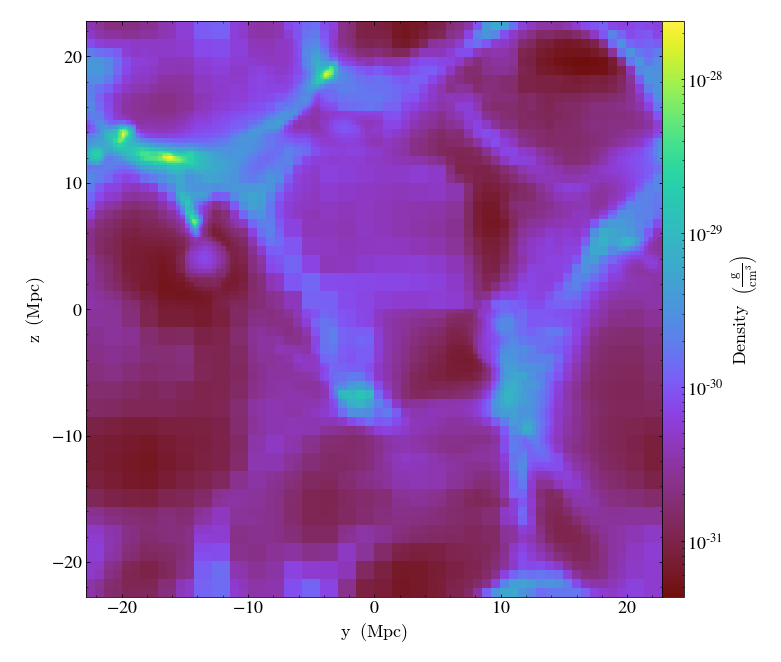

In [9]:
sliceoutputs[1].show()

or we need to return objects that do not rely on those references, e.g.,:

In [10]:
sliceoutputs = []
for ds_name in ["IsolatedGalaxy", "enzo_tiny_cosmology"]:
    ds = yt.load_sample(ds_name)
    slc = yt.SlicePlot(ds, "x", ("gas", "density"))
    sliceoutputs.append(slc._repr_html_())

yt : [INFO     ] 2022-07-12 12:09:11,607 Sample dataset found in '/home/chris/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2022-07-12 12:09:11,714 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2022-07-12 12:09:11,715 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-07-12 12:09:11,717 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-12 12:09:11,718 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-07-12 12:09:11,720 Parameters: cosmological_simulation   = 0
Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 9472.28it/s]
yt : [INFO     ] 2022-07-12 12:09:11,758 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2022-07-12 12:09:13,745 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-07-12 12:09:13,746 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-07-12 12:09:13,747 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-07-12 12:09


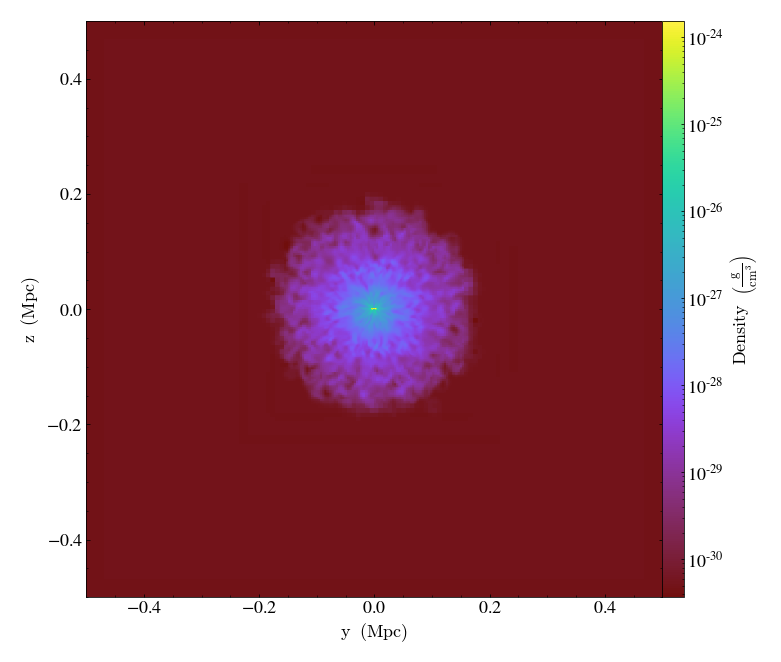


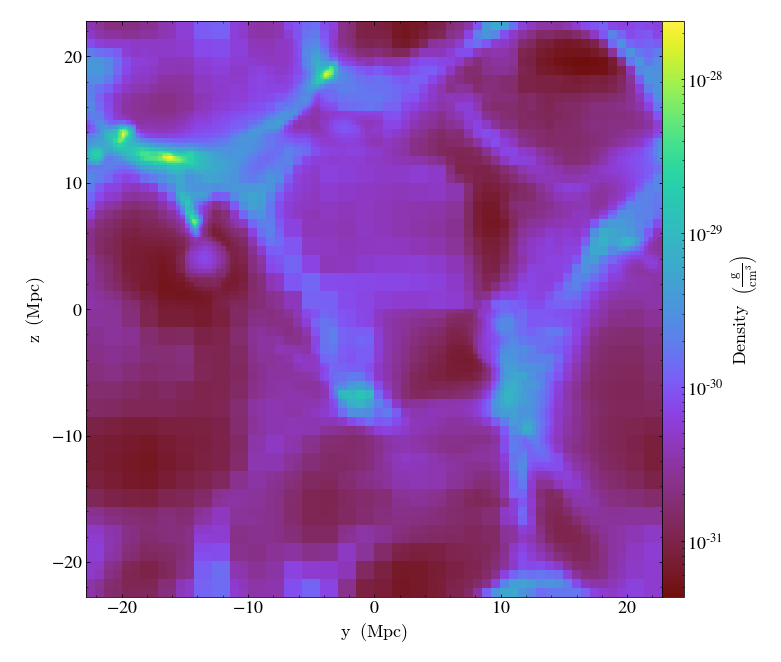

In [14]:
from IPython.core.display import display, HTML
display(HTML(sliceoutputs[0]))
display(HTML(sliceoutputs[1]))

the second route is more amenable to server operation but maybe less ideal for interactive usage? 